# Guidelines 

# Imports

In [1]:
%reload_ext autoreload
%autoreload 2

import os
import math
import warnings
import math
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from catboost import Pool, CatBoostRegressor
from pandas_profiling import ProfileReport
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn import set_config
from hyperopt import tpe
#from hpsklearn import HyperoptEstimator
#from hpsklearn import any_regressor
#from hpsklearn import any_preprocessing
from pandas_profiling import ProfileReport
from yellowbrick.features import RadViz
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.ensemble import (RandomForestRegressor, 
                              GradientBoostingRegressor
                             ) 
from sklearn.dummy import DummyRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import (IterativeImputer,
                            SimpleImputer,
                            KNNImputer
                           )
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score, 
                                     StratifiedKFold,
                                     RepeatedStratifiedKFold,
                                     GridSearchCV,
                                     learning_curve
                                    )
from sklearn.metrics import (mean_squared_error, # Regression
                             explained_variance_score, # Regression
                             r2_score, # Regression
                             mean_absolute_error, # Regression
                             max_error, # Regression
                             accuracy_score, # Classification
                             precision_score, # Classification
                             recall_score, # Classification
                             plot_confusion_matrix, # Classification
                             classification_report, # Classification
                            )
from sklearn.preprocessing import (StandardScaler, 
                                   OneHotEncoder,
                                   LabelEncoder,
                                   QuantileTransformer,
                                   RobustScaler,
                                   MinMaxScaler
                                  )
from sklearn.pipeline import (Pipeline,
                              make_pipeline
                             )
from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  Lasso,
                                  BayesianRidge
                                 )
from sklearn.svm import (LinearSVR,
                         SVR
                        )

#from lazypredict.Supervised import LazyClassifier

from utils_elec_notebook import *
from utils_elec_code import *

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

set_config(display='diagram', print_changed_only=False)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

warnings.filterwarnings('ignore')

# Setting theme
sns.set_theme(style="white")

In [2]:
import xgboost
xgboost.__version__

'1.3.0'

# Download CSV

In [3]:
# Import .csv file and convert into a pandas dataframe
df_general = pd.read_csv("df_cleaned.csv", sep=",", encoding="utf-8", low_memory=False)


# Overview

In [4]:
# Overview
info(df_general)
df_general.head()

34 columns
1695 rows
Rate of missing values in df : 8.703800104112442 %


,OSEBuildingID,DataYear,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,BuildingType,City,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),LargestPropertyUseType,LargestPropertyUseTypeGFA,Latitude,ListOfAllPropertyUseTypes,Longitude,Neighborhood,NumberofBuildings,NumberofFloors,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),State,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ZipCode,Age
0,1,2016,Mayflower park hotel,0659000030,7,False,Compliant,14.0,31.0,405 Olive way,NonResidential,Seattle,60.0,249.98,Hotel,88434.0,47.61220,Hotel,-122.33799,DOWNTOWN,1.0,12.0,Hotel,88434.0,0.0,88434.0,NaN,NaN,7226362.5,WA,NaN,NaN,98101.0,94.0
1,10,2016,Camlin,0660000825,7,False,Compliant,14.0,31.0,1619 9th Avenue,NonResidential,Seattle,27.0,176.14,Hotel,81352.0,47.61390,Hotel,-122.33283,DOWNTOWN,1.0,11.0,Hotel,83008.0,0.0,83008.0,NaN,NaN,5758795.0,WA,NaN,NaN,98101.0,95.0
2,100,2016,City Place III - SEDO,1983200325,7,False,Compliant,56.0,10.0,551 Boren Ave. North,NonResidential,Seattle,96.0,138.85,Office,261826.0,47.62424,"Office, Other, Parking, Retail Store",-122.33646,LAKE UNION,1.0,5.0,Large Office,316306.0,0.0,316306.0,Parking,150726.0,13795954.0,WA,Other,15139.0,98109.0,11.0
3,102,2016,Residence Inn Seattle - Lake Union,1984200065,3,False,Compliant,56.0,10.0,800 Fairview Ave. N,NonResidential,Seattle,37.0,526.85,Hotel,235788.0,47.62642,"Hotel, Parking",-122.33325,LAKE UNION,1.0,7.0,Hotel,238097.0,44766.0,282863.0,Parking,51537.0,19459304.0,WA,NaN,NaN,98109.0,31.0
4,103,2016,Key Arena,1985200003,7,False,Compliant,50.0,40.0,334 1st Ave. N,Nonresidential COS,Seattle,NaN,607.41,Other,368000.0,47.62208,Other,-122.35398,MAGNOLIA / QUEEN ANNE,1.0,1.0,Other,389000.0,0.0,389000.0,NaN,NaN,23658978.0,WA,NaN,NaN,98109.0,59.0


In [5]:
#
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 34 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  1695 non-null   int64  
 1   DataYear                                                       1695 non-null   int64  
 2   PropertyName                                                   1695 non-null   object 
 3   TaxParcelIdentificationNumber                                  1695 non-null   object 
 4   CouncilDistrictCode                                            1695 non-null   int64  
 5   DefaultData                                                    1695 non-null   object 
 6   ComplianceStatus                                               1695 non-null   object 
 7   Seattle Police Department Micro Community Policing Plan Area

In [6]:
# Numerical variables to cast as strings
list_variables_to_cast_general = ["OSEBuildingID",
                                     "DataYear",
                                     "CouncilDistrictCode",
                                     "ZipCode", 
                                     "Seattle Police Department Micro Community Policing Plan Areas", 
                                     "SPD Beats"
                                  ]   


# Cast non-computable numerical variable as strings
df_general[list_variables_to_cast_general] = df_general[list_variables_to_cast_general].astype(str)

# Check cast
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 34 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  1695 non-null   object 
 1   DataYear                                                       1695 non-null   object 
 2   PropertyName                                                   1695 non-null   object 
 3   TaxParcelIdentificationNumber                                  1695 non-null   object 
 4   CouncilDistrictCode                                            1695 non-null   object 
 5   DefaultData                                                    1695 non-null   object 
 6   ComplianceStatus                                               1695 non-null   object 
 7   Seattle Police Department Micro Community Policing Plan Area

# Set index

In [7]:
# Select metadata variables as index variables
index_list = ['OSEBuildingID',
              'PropertyName',
              'Address',
              'City',
              'Latitude',
              'Longitude',
              'State',
              #'TaxParcelIdentificationNumber',
              #'CouncilDistrictCode',
              #'DefaultData',
              #'ComplianceStatus',
              #'Seattle Police Department Micro Community Policing Plan Areas',
              #'SPD Beats',
              #'DataYear'
             ]

# Irrelevant variables
to_drop_list = ['TaxParcelIdentificationNumber',
                'DefaultData',
                'DataYear',
                'CouncilDistrictCode',
                'SPD Beats',
                'ComplianceStatus',
                'Seattle Police Department Micro Community Policing Plan Areas'
               ]

# Drop irrelevant variables
df_general.drop(columns=to_drop_list, inplace = True)

# Set index
df_general.set_index(index_list, inplace = True)

# Overview
info(df_general)
df_general.head()

20 columns
1695 rows
Rate of missing values in df : 14.466076696165192 %


,,,,,,,BuildingType,ENERGYSTARScore,GHGEmissions(MetricTonsCO2e),LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,Neighborhood,NumberofBuildings,NumberofFloors,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ZipCode,Age
OSEBuildingID,PropertyName,Address,City,Latitude,Longitude,State,,,,,,,,,,,,,,,,,,,,
1,Mayflower park hotel,405 Olive way,Seattle,47.61220,-122.33799,WA,NonResidential,60.0,249.98,Hotel,88434.0,Hotel,DOWNTOWN,1.0,12.0,Hotel,88434.0,0.0,88434.0,NaN,NaN,7226362.5,NaN,NaN,98101.0,94.0
10,Camlin,1619 9th Avenue,Seattle,47.61390,-122.33283,WA,NonResidential,27.0,176.14,Hotel,81352.0,Hotel,DOWNTOWN,1.0,11.0,Hotel,83008.0,0.0,83008.0,NaN,NaN,5758795.0,NaN,NaN,98101.0,95.0
100,City Place III - SEDO,551 Boren Ave. North,Seattle,47.62424,-122.33646,WA,NonResidential,96.0,138.85,Office,261826.0,"Office, Other, Parking, Retail Store",LAKE UNION,1.0,5.0,Large Office,316306.0,0.0,316306.0,Parking,150726.0,13795954.0,Other,15139.0,98109.0,11.0
102,Residence Inn Seattle - Lake Union,800 Fairview Ave. N,Seattle,47.62642,-122.33325,WA,NonResidential,37.0,526.85,Hotel,235788.0,"Hotel, Parking",LAKE UNION,1.0,7.0,Hotel,238097.0,44766.0,282863.0,Parking,51537.0,19459304.0,NaN,NaN,98109.0,31.0
103,Key Arena,334 1st Ave. N,Seattle,47.62208,-122.35398,WA,Nonresidential COS,NaN,607.41,Other,368000.0,Other,MAGNOLIA / QUEEN ANNE,1.0,1.0,Other,389000.0,0.0,389000.0,NaN,NaN,23658978.0,NaN,NaN,98109.0,59.0


In [8]:
# Check that retained buildings are non-habitable
df_general.PrimaryPropertyType.unique()

array(['Hotel', 'Large Office', 'Other', 'Small- and Mid-Sized Office',
       'K-12 School', 'Mixed Use Property', 'Hospital', 'University',
       'Residence Hall', 'Retail Store', 'Worship Facility', 'Warehouse',
       'Distribution Center', 'Restaurant', 'Laboratory',
       'Medical Office', 'Senior Care Community',
       'Supermarket / Grocery Store', 'Refrigerated Warehouse',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse',
       'Restaurant\n', 'Office'], dtype=object)

# Input/Output data

<AxesSubplot:>

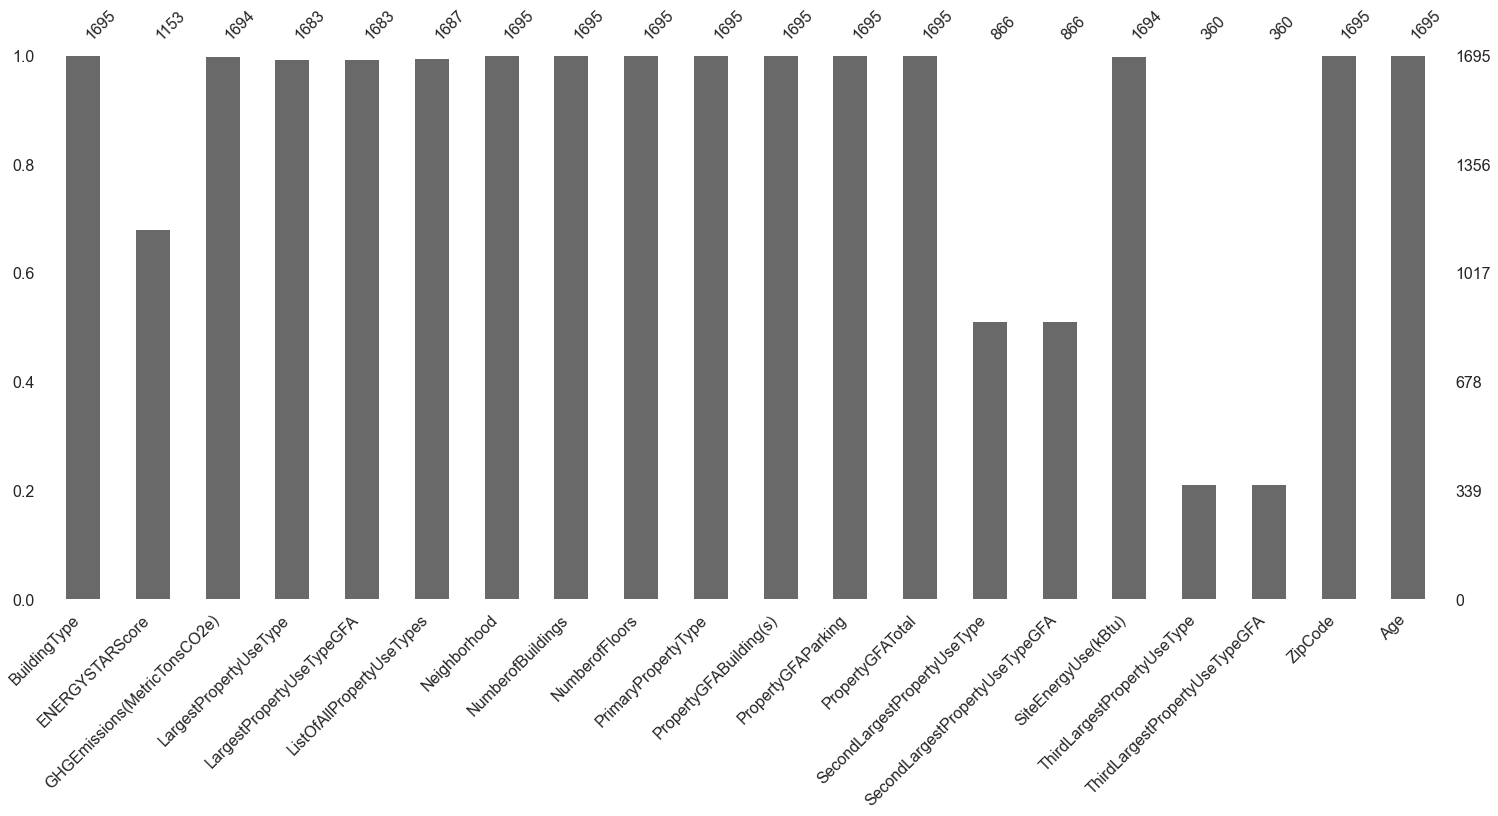

In [9]:
# Check missing data
msno.bar(df_general)

In [10]:
#new_order_columns = ['']
#df_general = df_general.reindex(new_order_columns, axis=1)

In [11]:
# Check variables type
df_general.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1695 entries, ('1', 'Mayflower park hotel', '405 Olive way', 'Seattle', 47.6122, -122.33799, 'WA') to ('98', 'Firestone Store#012432', '400 Westlake Ave N', 'Seattle', 47.62237, -122.33805, 'WA')
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1695 non-null   object 
 1   ENERGYSTARScore                  1153 non-null   float64
 2   GHGEmissions(MetricTonsCO2e)     1694 non-null   float64
 3   LargestPropertyUseType           1683 non-null   object 
 4   LargestPropertyUseTypeGFA        1683 non-null   float64
 5   ListOfAllPropertyUseTypes        1687 non-null   object 
 6   Neighborhood                     1695 non-null   object 
 7   NumberofBuildings                1695 non-null   float64
 8   NumberofFloors                   1695 non-null   float64
 9   PrimaryPropertyType              1

## Prepare input data

<AxesSubplot:>

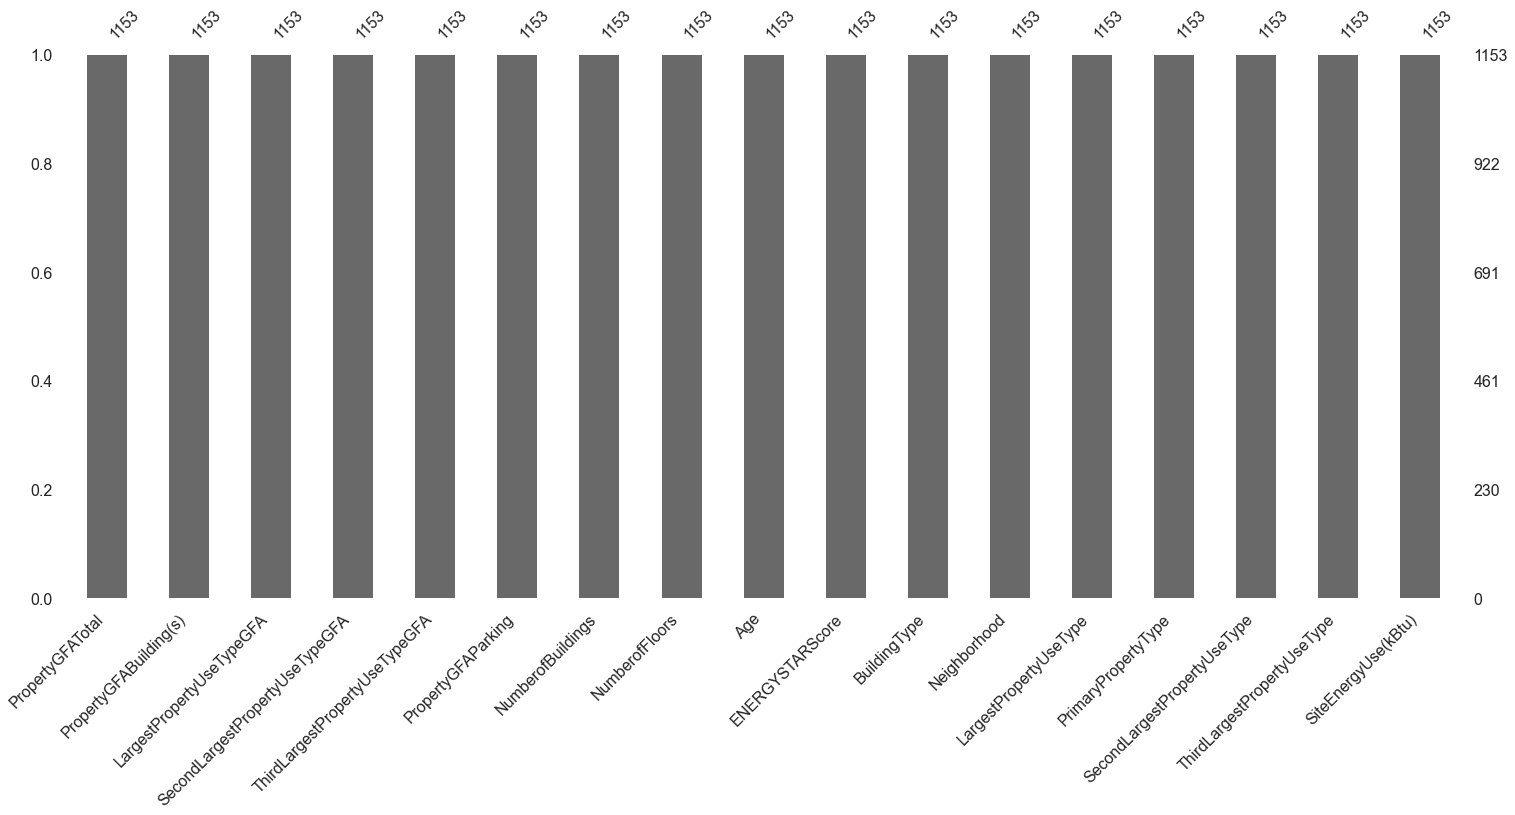

In [12]:
# prepare_input_data() is defined in utils_elec_code.py
df_general_training, X, y, numerical_list, categorical_list = prepare_input_data(df_general, 'SiteEnergyUse(kBtu)')

# Check missing values
msno.bar(df_general_training)


In [13]:
# Check variables type
df_general_training.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1153 entries, ('1', 'Mayflower park hotel', '405 Olive way', 'Seattle', 47.6122, -122.33799, 'WA') to ('98', 'Firestone Store#012432', '400 Westlake Ave N', 'Seattle', 47.62237, -122.33805, 'WA')
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PropertyGFATotal                 1153 non-null   float64
 1   PropertyGFABuilding(s)           1153 non-null   float64
 2   LargestPropertyUseTypeGFA        1153 non-null   float64
 3   SecondLargestPropertyUseTypeGFA  1153 non-null   float64
 4   ThirdLargestPropertyUseTypeGFA   1153 non-null   float64
 5   PropertyGFAParking               1153 non-null   float64
 6   NumberofBuildings                1153 non-null   float64
 7   NumberofFloors                   1153 non-null   float64
 8   Age                              1153 non-null   float64
 9   ENERGYSTARScore                  1

# Models

In [14]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

## Dummy regression (Baseline)

### Raw

In [15]:
# Model
schema_function(numerical_list, categorical_list, DummyRegressor())

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputation_median',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose=0)),
                                                                  ('scaler',
                                                                   StandardScale...
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True))],
                                                           verbose=False),
                                                  ['BuildingType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType',
                                                   'PrimaryPropertyType',
                                                   'SecondLargestPropertyUseType',
                                                   'ThirdLargestPropertyUseType'])],
                                   verbose=False)),
                ('dummyregressor',
                 DummyRegressor(constant=None, quantile=None,
                                strategy='mean'))],
         verbose=False)

DummyRegressor(constant=None, quantile=None, strategy='mean') Performance - 1 fold - train set: 
RMSE: 23630280.882408507
MAE: 6305077.883540878
ME: 445791281.69138956
R2: -0.0469336494458219

DummyRegressor(constant=None, quantile=None, strategy='mean') Performance - 1 fold - test set: 
RMSE: 27407402.175990585
MAE: 8352382.188896868
ME: 290496753.69138956
R2: -0.07089837856516312

Running time: 0:00:00.296845


DummyRegressor(constant=None, quantile=None, strategy='mean') Performance - CV 3 fold - train set: 
RMSE: 24337768.287604287
MAE: 6844203.927515569
ME: -393910877.159949
R2: -0.053489168569477163

DummyRegressor(constant=None, quantile=None, strategy='mean') Performance - CV 3 fold - test set: 
RMSE: 23447048.344717134
MAE: 7234734.601352938
ME: -329059927.82661563
R2: -0.054365202014278045

Running time cv: 0:00:00.434591




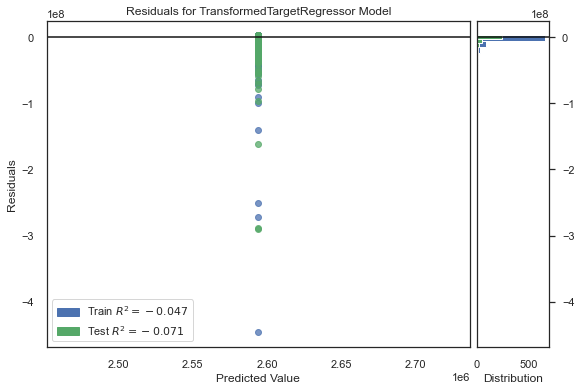

In [16]:
# regression_eval_model_function is defined in utils.py
results_dummy_regr = regression_eval_model_function(X, 
                                                    y, 
                                                    numerical_list, 
                                                    categorical_list, 
                                                    'SiteEnergyUse(kBtu)',
                                                    DummyRegressor(), 
                                                    StandardScaler(),
                                                    0.3,
                                                    0, 
                                                    3
                                                   )

### Grid Search

Hyperparameters:
Best params:
 {'regressor__dummyregressor__strategy': 'mean'}

DummyRegressor(constant=None, quantile=None, strategy='mean') Performance - 1 fold - train set: 
RMSE: 23630280.882408507
MAE: 6305077.883540878
ME: 445791281.69138956
R2: -0.0469336494458219

DummyRegressor(constant=None, quantile=None, strategy='mean') Performance - 1 fold - test set: 
RMSE: 27407402.175990585
MAE: 8352382.188896868
ME: 290496753.69138956
R2: -0.07089837856516312

Running time: 0:00:00.394716


DummyRegressor(constant=None, quantile=None, strategy='mean') Performance - CV 3 fold - train set: 
RMSE: 24337768.287604287
MAE: 6844203.927515569
ME: -393910877.159949
R2: -0.053489168569477163

DummyRegressor(constant=None, quantile=None, strategy='mean') Performance - CV 3 fold - test set: 
RMSE: 23447048.344717134
MAE: 7234734.601352938
ME: -329059927.82661563
R2: -0.054365202014278045

Running time cv: 0:00:01.127431




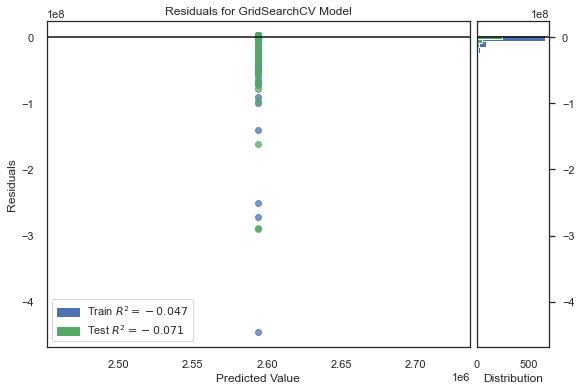

In [17]:
# regression_eval_model_function is defined in utils.py
results_dummy_regr_gs = regression_eval_model_function(X, 
                                                       y, 
                                                       numerical_list, 
                                                       categorical_list, 
                                                       'SiteEnergyUse(kBtu)',
                                                       DummyRegressor(), 
                                                       StandardScaler(),
                                                       0.3,
                                                       1, 
                                                       3
                                                      )

### Learning Curves

<Figure size 648x432 with 0 Axes>

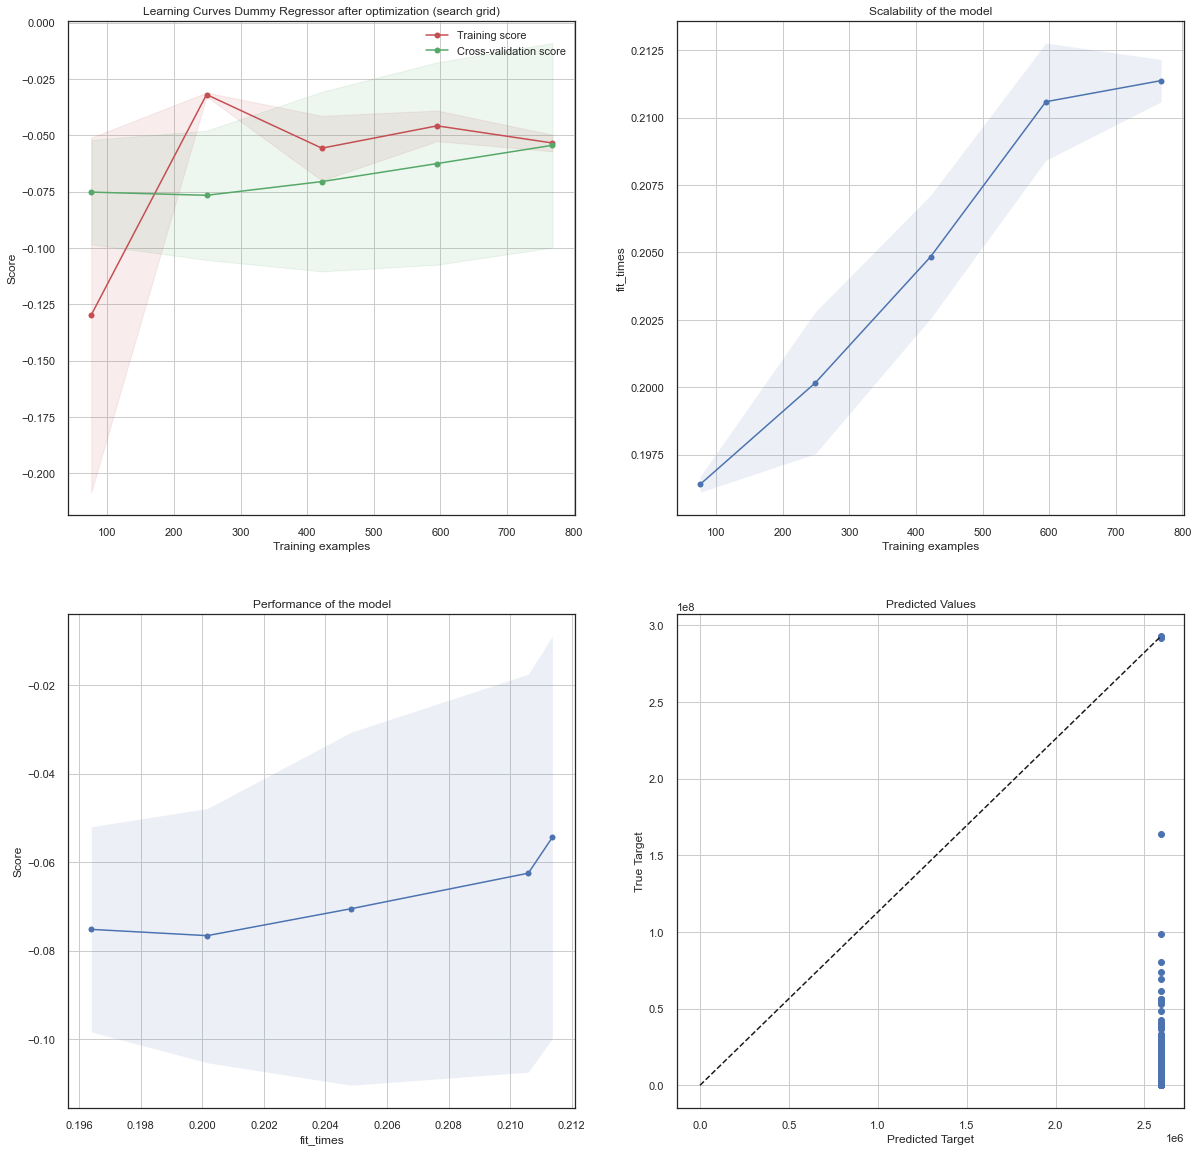

Text(0.5, 1.0, '')

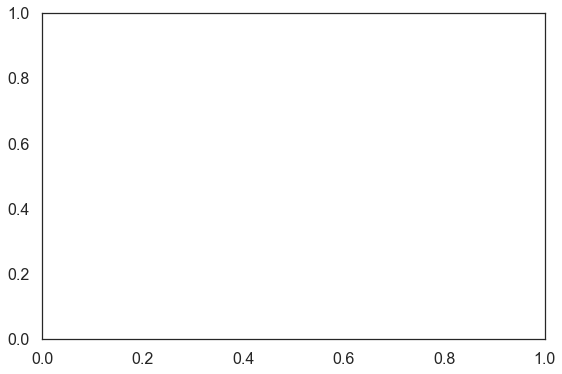

In [18]:
# Visualize learning curves
plt.figure()

estimator = results_dummy_regr_gs[6]

title = r"Learning Curves Dummy Regressor after optimization (search grid)"
plot_learning_curve(estimator, 
                    title, 
                    X, 
                    y, 
                    results_dummy_regr_gs[3], 
                    results_dummy_regr_gs[4], 
                    results_dummy_regr_gs[5], 
                    cv=3
                   )



plt.show()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(r"", fontsize=16)

## Linear regression

### Raw

In [19]:
# Estimator schema
# schema_function is defined in utils.py
schema_function(numerical_list, categorical_list, LinearRegression())


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputation_median',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose=0)),
                                                                  ('scaler',
                                                                   StandardScale...
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True))],
                                                           verbose=False),
                                                  ['BuildingType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType',
                                                   'PrimaryPropertyType',
                                                   'SecondLargestPropertyUseType',
                                                   'ThirdLargestPropertyUseType'])],
                                   verbose=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Performance - 1 fold - train set: 
RMSE: 99989925.11604479
MAE: 8829156.155816384
ME: 2012441154.9100213
R2: -17.745363959107216

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Performance - 1 fold - test set: 
RMSE: 3271705752.4318767
MAE: 226637026.6668287
ME: 60145199933.90518
R2: -15259.226891854958

Running time: 0:00:00.226853


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Performance - CV 3 fold - train set: 
RMSE: 114585898.68429123
MAE: 9245652.550496329
ME: -3007395096.24342
R2: -26.523162089713214

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Performance - CV 3 fold - test set: 
RMSE: 384502635.655957
MAE: 30477957.44158032
ME: -7201006121.141608
R2: -359.95772537964905

Running time cv: 0:00:00.437492




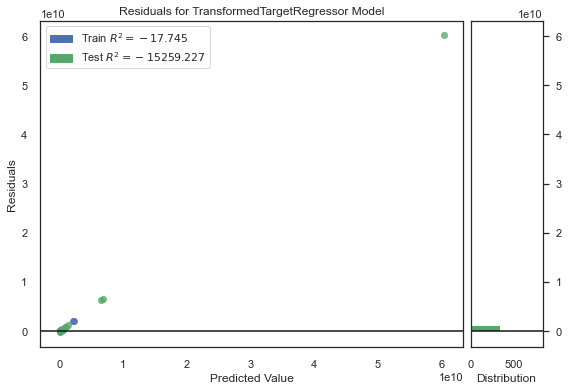

In [20]:
# linear_regression_eval_model_function is defined in utils.py
results_linear_regression = regression_eval_model_function(X, 
                                                           y, 
                                                           numerical_list, 
                                                           categorical_list,
                                                           'SiteEnergyUse(kBtu)',
                                                           LinearRegression(),
                                                           RobustScaler(),
                                                           0.3,
                                                           0, 
                                                           3
                                                          )
#
baseline_mse_error = results_linear_regression[3]


### Regression Ridge

In [21]:
# Estimator schema
# schema_function is defined in utils.py
schema_function(numerical_list, categorical_list, Ridge())


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputation_median',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose=0)),
                                                                  ('scaler',
                                                                   StandardScale...
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True))],
                                                           verbose=False),
                                                  ['BuildingType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType',
                                                   'PrimaryPropertyType',
                                                   'SecondLargestPropertyUseType',
                                                   'ThirdLargestPropertyUseType'])],
                                   verbose=False)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [22]:
# Manual grid search

Hyperparameters: 
Ridge index of minimum Mean square error: 33
Ridge alpha of minimum Mean square error: 2154.4346900318865
Ridge minimum Mean square error: 334601164560137.2
Ridge minimum Root mean square error: 18292106.618980143

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Performance - 1 fold - train set: 
RMSE: 23630280.88235783
MAE: 6305077.883500023
ME: 445791281.69086134
R2: -0.04693364944133127

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Performance - 1 fold - test set: 
RMSE: 27407402.175904978
MAE: 8352382.1888444545
ME: 290496753.6908219
R2: -0.07089837855847336

Running time: 0:00:02.897188


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Performance - CV 3 fold - train set: 
RMSE: 24337768.28754714
MAE: 6844203.

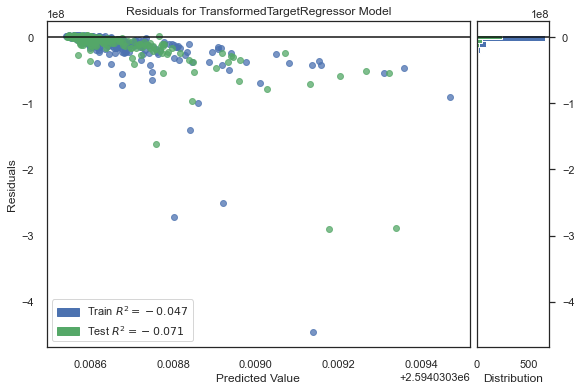

In [23]:
# regression_eval_model_function is defined in utils.py
results_ridge = regression_eval_model_function(X, 
                                               y, 
                                               numerical_list, 
                                               categorical_list,
                                               'SiteEnergyUse(kBtu)',
                                               Ridge(), 
                                               StandardScaler(),
                                               0.3,
                                               0, 
                                               3,
                                               bme=baseline_mse_error
                                              )


In [24]:
# Error as a function of alpha
# error_alpha_function is defined in utils.py
#error_alpha_function(results_ridge[3], results_ridge[4], results_ridge[5])


In [25]:
# Regularization path
# regularization_path_function is defined in utils.py
#regularization_path_function(results_ridge[3], results_ridge[4], results_ridge[5])


### Lasso

In [26]:
# Estimator schema
# schema_function is defined in utils.py
schema_function(numerical_list, categorical_list, Lasso())


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputation_median',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose=0)),
                                                                  ('scaler',
                                                                   StandardScale...
                                                  ['BuildingType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType',
                                                   'PrimaryPropertyType',
                                                   'SecondLargestPropertyUseType',
                                                   'ThirdLargestPropertyUseType'])],
                                   verbose=False)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [27]:
# Manual grid search

Hyperparameters: 
Lasso index of minimum Mean square error: 13
Lasso alpha of minimum Mean square error: 0.37649358067924676
Lasso minimum Mean square error: 390998813635571.94
Lasso minimum Root mean square error: 19773689.934748445


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) Performance - 1 fold - train set: 
RMSE: 23630280.882408507
MAE: 6305077.883540878
ME: 445791281.69138956
R2: -0.0469336494458219

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) Performance - 1 fold - test set: 
RMSE: 27407402.175990585
MAE: 8352382.188896868
ME: 290496753.69138956
R2: -0.07089837856516312

Running time: 0:00:03.677798


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normal

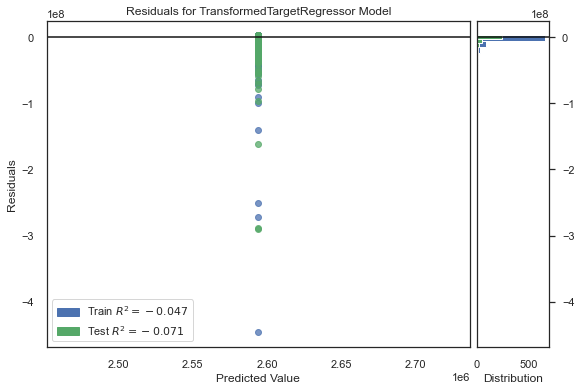

In [28]:
# regression_lasso_eval_model_function is defined in utils.py
results_lasso = regression_eval_model_function(X, 
                                               y, 
                                               numerical_list, 
                                               categorical_list,
                                               'SiteEnergyUse(kBtu)',
                                               Lasso(), 
                                               StandardScaler(),
                                               0.3,
                                               0, 
                                               3, 
                                               bme=baseline_mse_error
                                              )


In [29]:
# Error as a function of alpha
# error_alpha_function is defined in utils.py
#error_alpha_function(results_lasso[3], results_lasso[4], results_lasso[5])


In [30]:
# Regularization path
# regularization_path_function is defined in utils.py
#regularization_path_function(results_lasso[3], results_lasso[4], results_lasso[6])


## KNN regression

### Raw

In [31]:
# Model
schema_function(numerical_list, categorical_list, KNeighborsRegressor())


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputation_median',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose=0)),
                                                                  ('scaler',
                                                                   StandardScale...
                                                                                 sparse=True))],
                                                           verbose=False),
                                                  ['BuildingType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType',
                                                   'PrimaryPropertyType',
                                                   'SecondLargestPropertyUseType',
                                                   'ThirdLargestPropertyUseType'])],
                                   verbose=False)),
                ('kneighborsregressor',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') Performance - 1 fold - train set: 
RMSE: 18926340.416478332
MAE: 3846638.529831552
ME: 394364233.8909237
R2: 0.32839381773826093

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') Performance - 1 fold - test set: 
RMSE: 20705503.423586953
MAE: 5678015.945184512
ME: 233377042.15438542
R2: 0.3887989325690808

Running time: 0:00:00.433097


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') Performance - CV 3 fold - train set: 
RMSE: 18267420.652259126
MAE: 4130076.3832342643
ME: -321899629.49099845
R2: 0.41765180064100554

KNeighborsRegressor(al

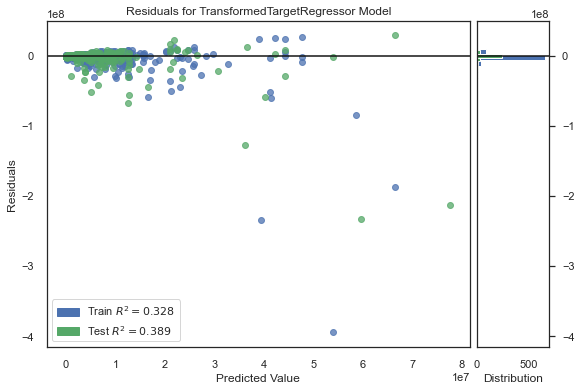

In [32]:
# regression_eval_model_function is defined in utils.py
results_knn = regression_eval_model_function(X, 
                                             y, 
                                             numerical_list, 
                                             categorical_list,
                                             'SiteEnergyUse(kBtu)',
                                             KNeighborsRegressor(), 
                                             RobustScaler(),
                                             0.3,
                                             0, 
                                             3
                                            )


### Grid Search

Hyperparameters:
Best params:
 {'regressor__kneighborsregressor__n_neighbors': 3, 'regressor__kneighborsregressor__weights': 'distance'}

accuracy = 0.313 (+/-0.300) for {'regressor__kneighborsregressor__n_neighbors': 3, 'regressor__kneighborsregressor__weights': 'distance'}


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') Performance - 1 fold - train set: 
RMSE: 2.2424024095916896e-08
MAE: 5.447284965931704e-09
ME: 4.172325134277344e-07
R2: 1.0

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') Performance - 1 fold - test set: 
RMSE: 23169189.93738141
MAE: 6316808.9943474345
ME: 257034618.732832
R2: 0.23469559099325088

Running time: 0:00:00.610502


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski

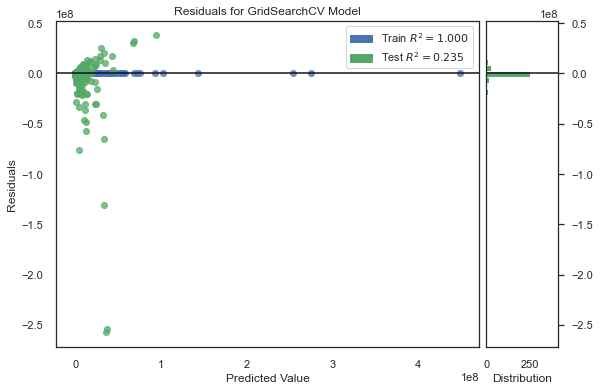

In [33]:
# regression_eval_model_function is defined in utils.py
#
results_knn_gs = regression_eval_model_function(X, 
                                                y, 
                                                numerical_list, 
                                                categorical_list,
                                                'SiteEnergyUse(kBtu)',
                                                KNeighborsRegressor(), 
                                                RobustScaler(),
                                                0.3,
                                                1, 
                                                3
                                               )


### Learning Curves

In [34]:
type( results_knn_gs[5])

numpy.ndarray

<Figure size 648x432 with 0 Axes>

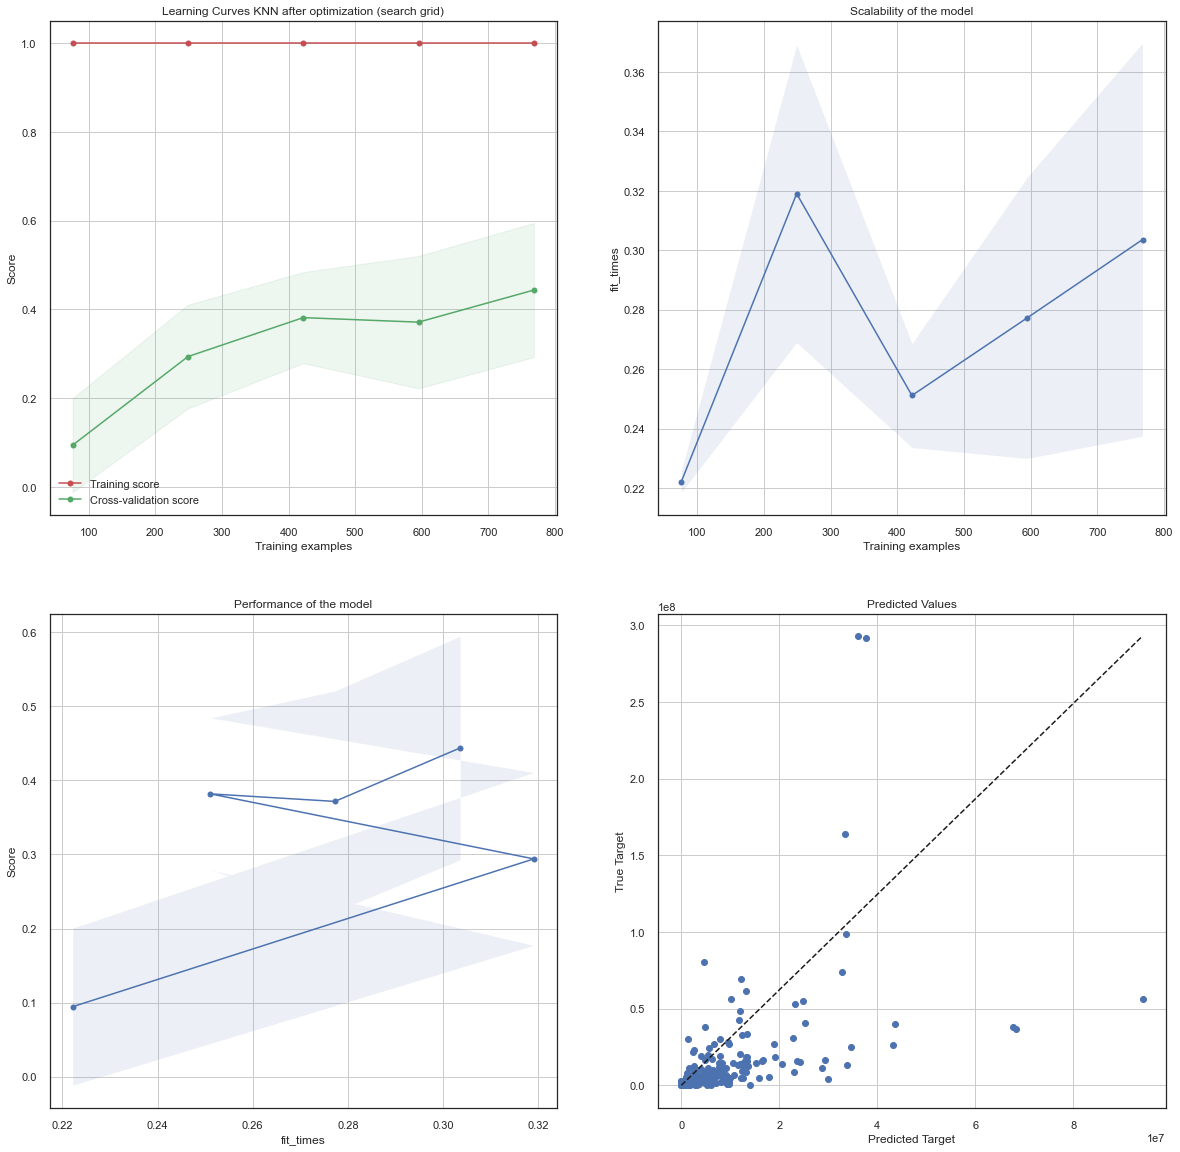

In [35]:
# Visualize learning curves
plt.figure()

estimator = results_knn_gs[6]

title = r"Learning Curves KNN after optimization (search grid)"
plot_learning_curve(estimator, 
                    title, 
                    X, 
                    y, 
                    results_knn_gs[3], 
                    results_knn_gs[4], 
                    results_knn_gs[5], 
                    cv=3)

plt.show()

## SVR

In [36]:
#
schema_function(numerical_list, categorical_list, SVR())


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputation_median',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose=0)),
                                                                  ('scaler',
                                                                   StandardScale...
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True))],
                                                           verbose=False),
                                                  ['BuildingType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType',
                                                   'PrimaryPropertyType',
                                                   'SecondLargestPropertyUseType',
                                                   'ThirdLargestPropertyUseType'])],
                                   verbose=False)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### Raw

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) Performance - 1 fold - train set: 
RMSE: 20807859.05474243
MAE: 4942077.074236333
ME: 380411958.95420736
R2: 0.1882240404601937

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) Performance - 1 fold - test set: 
RMSE: 26292292.43422058
MAE: 7196038.878603961
ME: 291123586.67524385
R2: 0.014470964889179982

Running time: 0:00:00.550783


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) Performance - CV 3 fold - train set: 
RMSE: 22177994.185478393
MAE: 5884260.0335332835
ME: -342144831.88243926
R2: 0.12499320808580472

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=

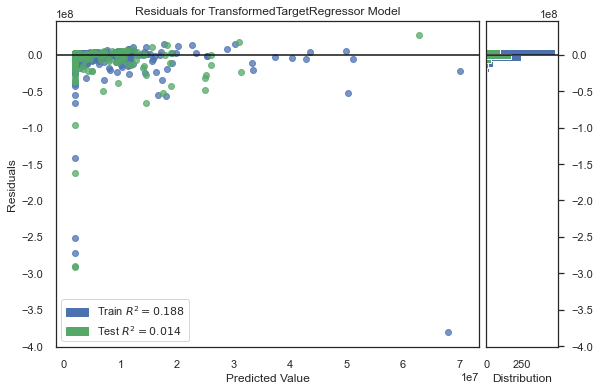

In [37]:
# regression_eval_model_function is defined in utils.py
results_svr = regression_eval_model_function(X, 
                                             y, 
                                             numerical_list, 
                                             categorical_list, 
                                             'SiteEnergyUse(kBtu)',
                                             SVR(), 
                                             RobustScaler(),
                                             0.3,
                                             0, 
                                             3
                                            )

### Grid Search

Hyperparameters:
Best params:
 {'regressor__svr__C': 10.0, 'regressor__svr__epsilon': 0.1, 'regressor__svr__kernel': 'rbf'}

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) Performance - 1 fold - train set: 
RMSE: 2423270.823253174
MAE: 834308.7024441481
ME: 42691791.66264695
R2: 0.9889900512474921

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) Performance - 1 fold - test set: 
RMSE: 23726228.543565087
MAE: 4830531.937770198
ME: 275736249.67095023
R2: 0.197453999938075

Running time: 0:00:06.059647


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) Performance - CV 3 fold - train set: 
RMSE: 14517035.048339486
MAE: 2278022.262086918
ME: -269343525.43348163
R2: 0.5955300877990936

SVR(C=1

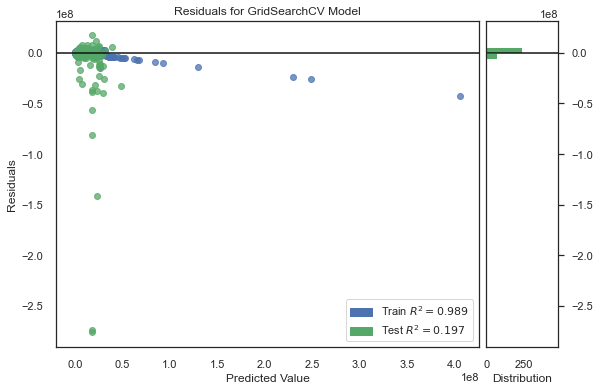

In [38]:
# regression_eval_model_function is defined in utils.py
results_svr_gs = regression_eval_model_function(X, 
                                             y, 
                                             numerical_list, 
                                             categorical_list, 
                                             'SiteEnergyUse(kBtu)',
                                             SVR(), 
                                             StandardScaler(),
                                             0.3,
                                             1, 
                                             3
                                            )


### Learning Curves

<Figure size 648x432 with 0 Axes>

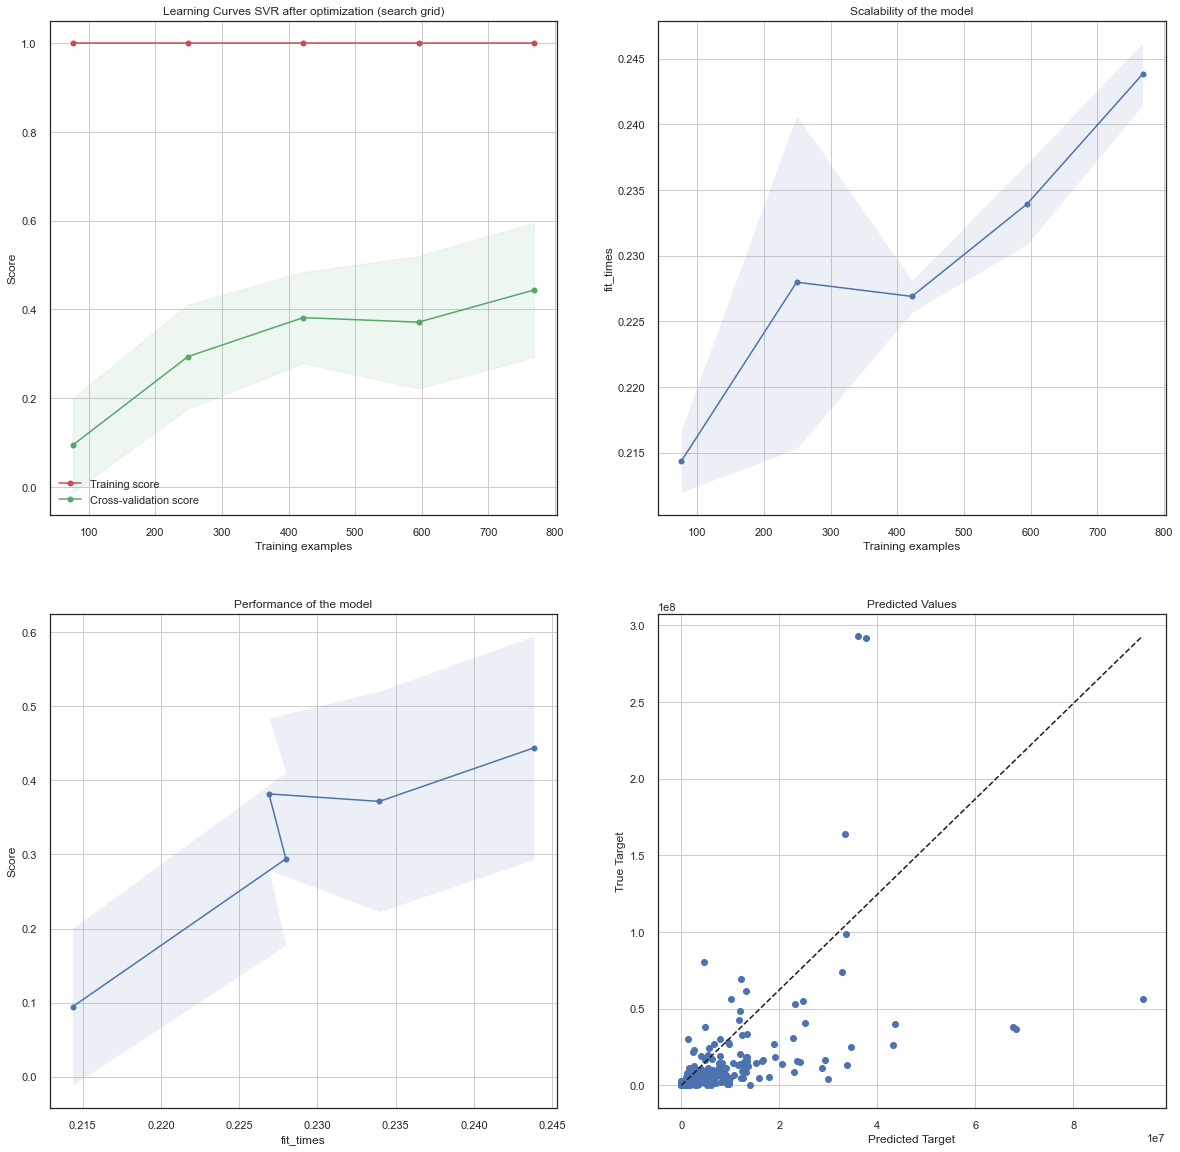

In [39]:
# Visualize learning curves
plt.figure()

#estimator = results_svr_gs[6]

title = r"Learning Curves SVR after optimization (search grid)"
plot_learning_curve(estimator, 
                    title, 
                    X, 
                    y, 
                    results_knn_gs[3],
                    results_knn_gs[4],
                    results_knn_gs[5],
                    cv=3)

plt.show()

## Gradient Boosting regression

In [40]:
# Model
schema_function(numerical_list, categorical_list, GradientBoostingRegressor())

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputation_median',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose=0)),
                                                                  ('scaler',
                                                                   StandardScale...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           presort='deprecated',
                                           random_state=None, subsample=1.0,
                                           tol=0.0001, validation_fraction=0.1,
                                           verbose=0, warm_start=False))],
         verbose=False)

### Raw

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) Performance - 1 fold - train set: 
RMSE: 8339027.297411243
MAE: 2067443.25116392
ME: 158162771.4547692
R2: 0.8696196382217392

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_

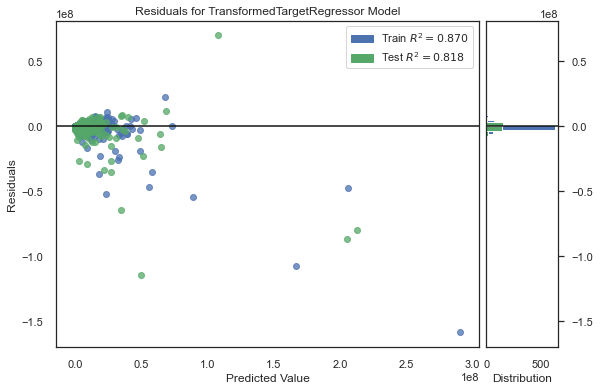

In [41]:
# regression_eval_model_function is defined in utils.py
results_gradient_boosting = regression_eval_model_function(X, 
                                                           y, 
                                                           numerical_list, 
                                                           categorical_list, 
                                                           'SiteEnergyUse(kBtu)',
                                                           GradientBoostingRegressor(),
                                                           RobustScaler(),
                                                           0.3,
                                                           0, 
                                                           3
                                                          )


### Grid Search

Hyperparameters:
Best params:
 {'regressor__gradientboostingregressor__learning_rate': 0.15, 'regressor__gradientboostingregressor__n_estimators': 100}

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) Performance - 1 fold - train set: 
RMSE: 6000224.597861966
MAE: 1731478.7726672988
ME: 102737443.58353359
R2: 0.9324980366464706

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,

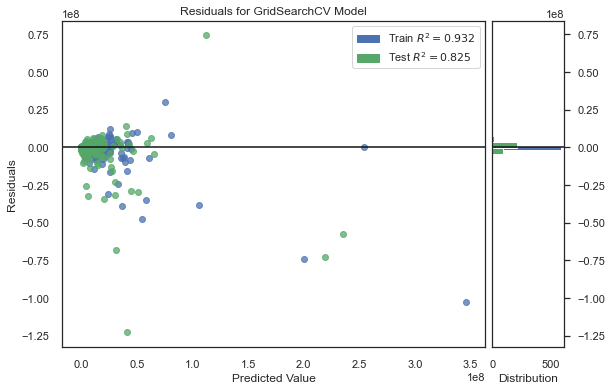

In [42]:
# regression_eval_model_function is defined in utils.py
results_gradient_boosting_gs = regression_eval_model_function(X, 
                                                              y, 
                                                              numerical_list, 
                                                              categorical_list,
                                                              'SiteEnergyUse(kBtu)',
                                                              GradientBoostingRegressor(), 
                                                              StandardScaler(),
                                                              0.3,
                                                              1, 
                                                              3
                                                             )


### Features Importance

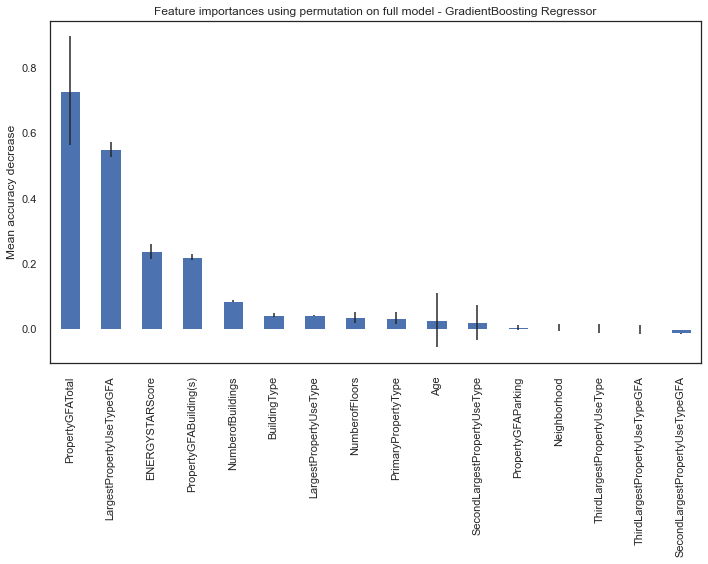

In [43]:
#
list_variables_model_minus_target = numerical_list + categorical_list 

#
estimator = results_gradient_boosting_gs[6]
X_test = results_gradient_boosting_gs[3]
y_test = results_gradient_boosting_gs[4]

#
result = permutation_importance(estimator, X_test, y_test)
gradient_importances = pd.Series(result.importances_mean, index=list_variables_model_minus_target)
gradient_importances_sorted = gradient_importances.sort_values(ascending=False, inplace=False, kind='quicksort')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,8))

# Plot
gradient_importances_sorted.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model - GradientBoosting Regressor")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


### Learning Curves

<Figure size 648x432 with 0 Axes>

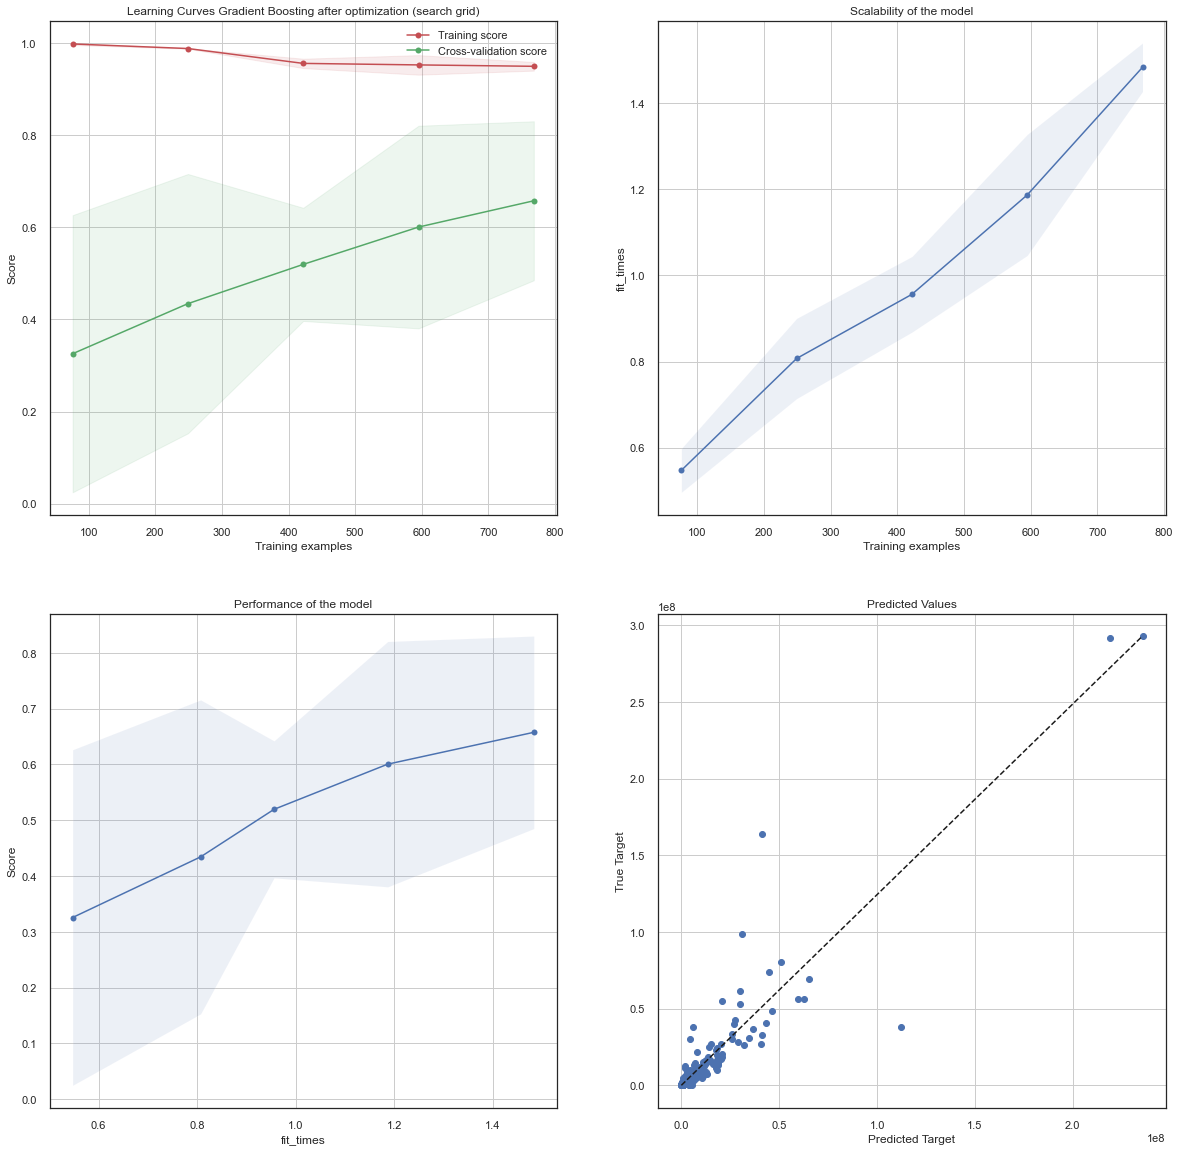

In [44]:
# Visualize learning curves
plt.figure()

estimator = results_gradient_boosting_gs[6]

title = r"Learning Curves Gradient Boosting after optimization (search grid)"
plot_learning_curve(estimator, 
                    title, 
                    X, 
                    y, 
                    results_gradient_boosting_gs[3],
                    results_gradient_boosting_gs[4],
                    results_gradient_boosting_gs[5],
                    cv=3)

plt.show()

## XGBoost

In [45]:
# Model
schema_function(numerical_list, categorical_list, XGBRegressor())

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputation_median',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose=0)),
                                                                  ('scaler',
                                                                   StandardScale...
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              objective='reg:squarederror', random_state=None,
                              reg_alpha=None, reg_lambda=None,
                              scale_pos_weight=None, subsample=None,
                              tree_method=None, validate_parameters=None,
                              verbosity=None))],
         verbose=False)

### Raw

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None) Performance - 1 fold - train set: 
RMSE: 788453.7745032932
MAE: 293303.18838378834
ME: 11582304.0
R2: 0.9988344420686908

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
      

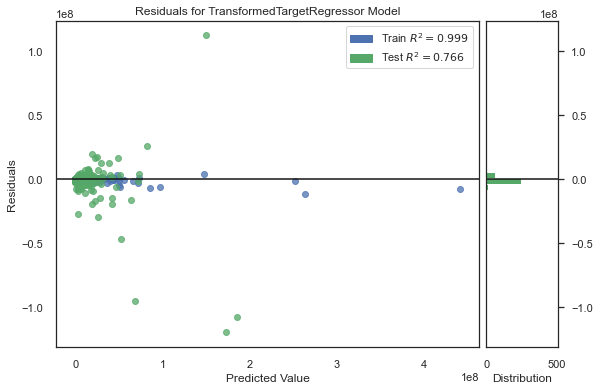

In [46]:
# regression_eval_model_function is defined in utils.py
results_xgboost = regression_eval_model_function(X, 
                                                 y, 
                                                 numerical_list, 
                                                 categorical_list, 
                                                 'SiteEnergyUse(kBtu)',
                                                 XGBRegressor(),
                                                 StandardScaler(),
                                                 0.3,
                                                 0, 
                                                 3
                                                )


### Grid Search

Hyperparameters:
Best params:
 {'regressor__xgbregressor__learning_rate': 0.3, 'regressor__xgbregressor__max_depth': 4}

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None) Performance - 1 fold - train set: 
RMSE: 3434573.9603440925
MAE: 900450.4609341604
ME: 84048704.0
R2: 0.9778829532110106

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, 

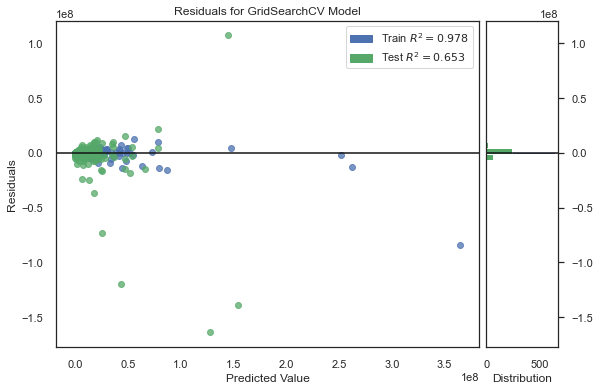

In [47]:
# regression_eval_model_function is defined in utils.py
results_xgboost_gs = regression_eval_model_function(X, 
                                                    y, 
                                                    numerical_list, 
                                                    categorical_list, 
                                                    'SiteEnergyUse(kBtu)',
                                                    XGBRegressor(), 
                                                    StandardScaler(),
                                                    0.3,
                                                    1, 
                                                    3
                                                   )

### Features Importance

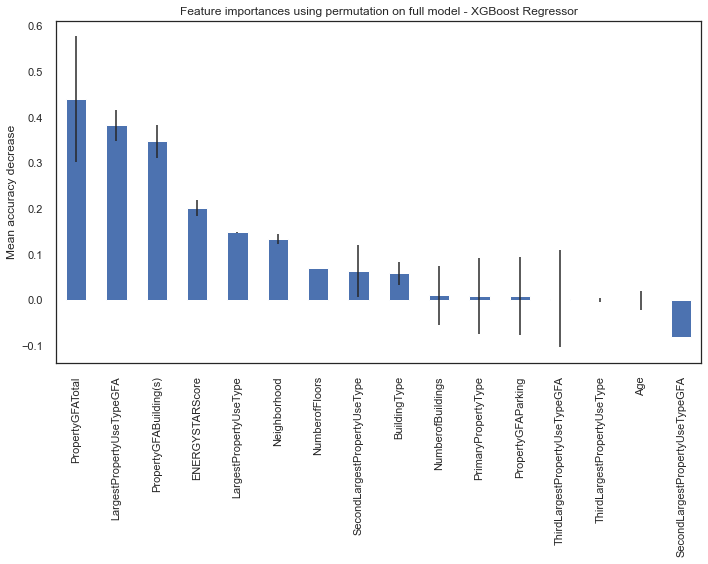

In [48]:
#
list_variables_model_minus_target = numerical_list + categorical_list 

#
estimator = results_xgboost_gs[6]
X_test = results_xgboost_gs[3]
y_test = results_xgboost_gs[4]

#
result = permutation_importance(estimator, X_test, y_test)
xgboost_importances = pd.Series(result.importances_mean, index=list_variables_model_minus_target)
xgboost_importances_sorted = xgboost_importances.sort_values(ascending=False, inplace=False, kind='quicksort')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,8))

# Plot
xgboost_importances_sorted.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model - XGBoost Regressor")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()



### Learning Curves

<Figure size 648x432 with 0 Axes>

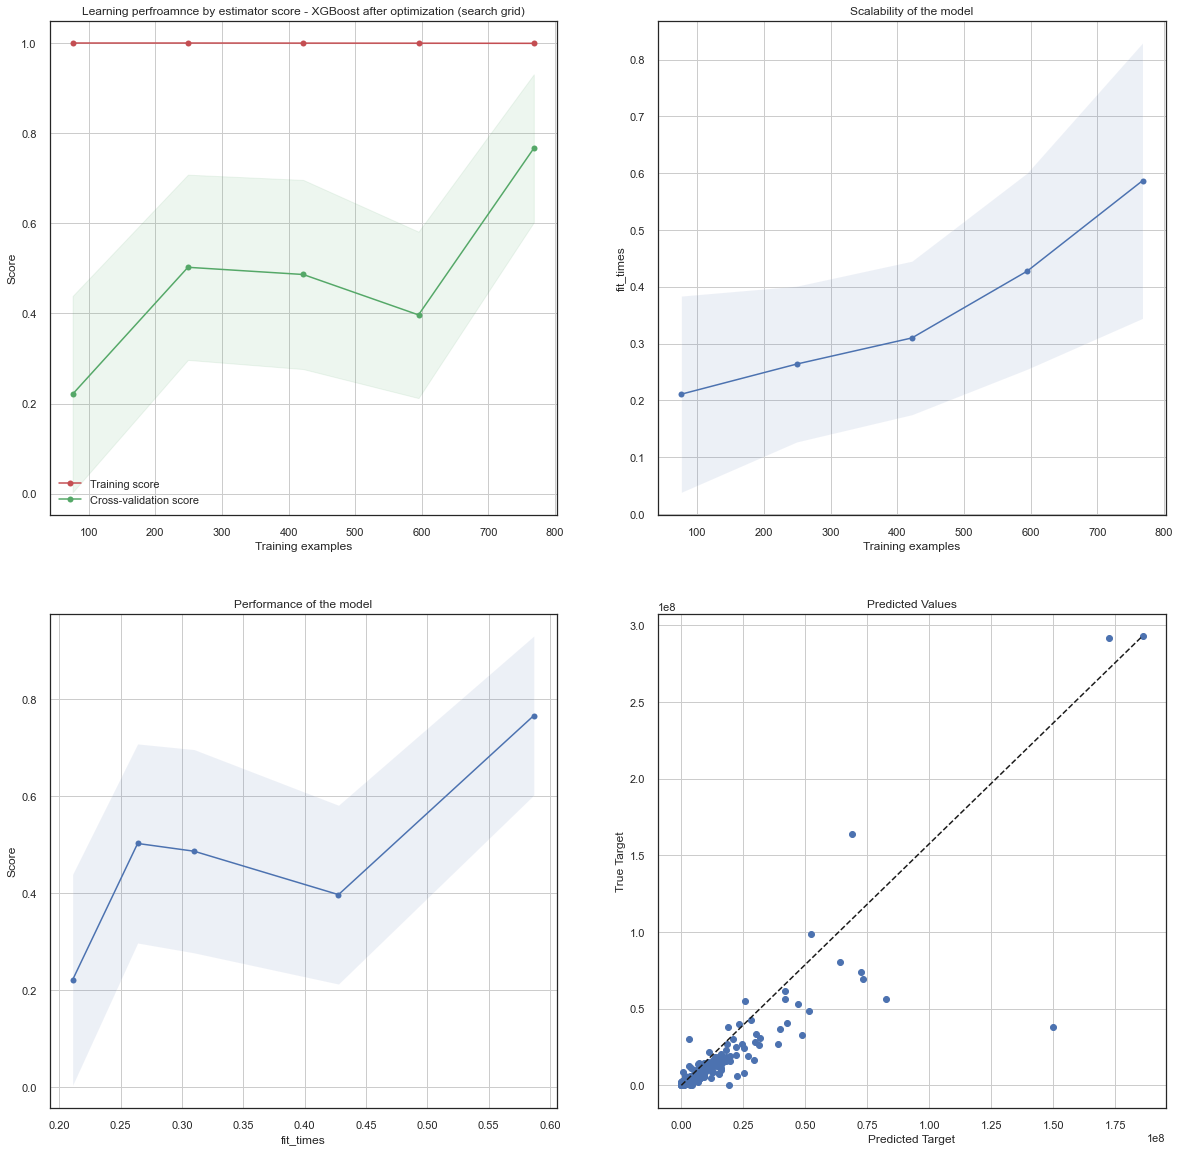

In [49]:
# Visualize learning curves
plt.figure()

estimator = results_xgboost[6]

title = r"Learning perfroamnce by estimator score - XGBoost after optimization (search grid)"
plot_learning_curve(estimator, 
                    title, 
                    X, 
                    y, 
                    results_xgboost[3],
                    results_xgboost[4],
                    results_xgboost[5],
                    cv=3)

plt.show()

## Random Forest regression

### Raw

In [50]:
# Model
schema_function(numerical_list, categorical_list, RandomForestRegressor())

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputation_median',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose=0)),
                                                                  ('scaler',
                                                                   StandardScale...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) Performance - 1 fold - train set: 
RMSE: 11398391.394162253
MAE: 1555341.4395447655
ME: 237549255.20581117
R2: 0.756404914661423

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                

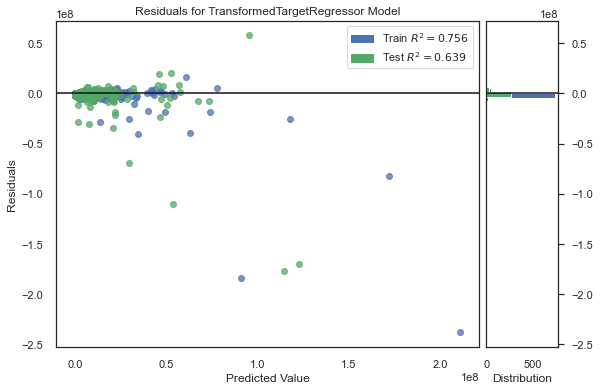

In [51]:
# regression_eval_model_function is defined in utils.py
results_random_forest = regression_eval_model_function(X, 
                                                       y, 
                                                       numerical_list, 
                                                       categorical_list, 
                                                       'SiteEnergyUse(kBtu)',
                                                       RandomForestRegressor(), 
                                                       StandardScaler(),
                                                       0.3,
                                                       0, 
                                                       3
                                                      )


### Grid Search

Hyperparameters:
Best params:
 {'regressor__randomforestregressor__ccp_alpha': 0, 'regressor__randomforestregressor__n_estimators': 100}

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) Performance - 1 fold - train set: 
RMSE: 10119089.522269128
MAE: 1568504.888406006
ME: 206918912.47876814
R2: 0.8368339710906064

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                  

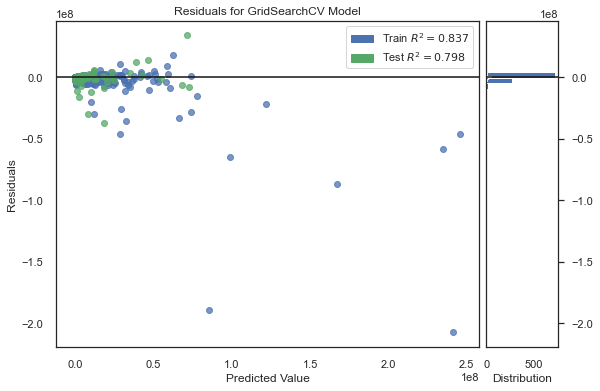

In [52]:
# regression_eval_model_function is defined in utils.py
results_random_forest_gs = regression_eval_model_function(X, 
                                                          y, 
                                                          numerical_list, 
                                                          categorical_list, 
                                                          'SiteEnergyUse(kBtu)',
                                                          RandomForestRegressor(), 
                                                          RobustScaler(),
                                                          0.1,
                                                          1, 
                                                          3
                                                         )


### Features Importance

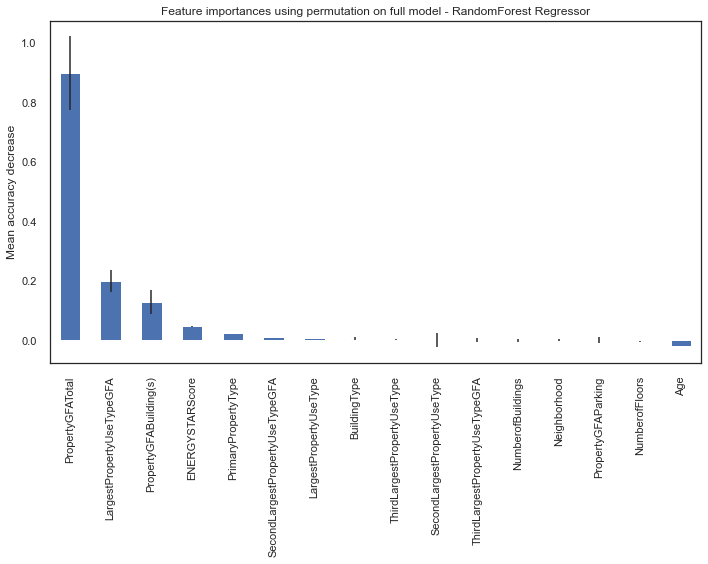

In [53]:
#
list_variables_model_minus_target = numerical_list + categorical_list 

#
estimator_random_forest = results_random_forest_gs[6]
X_test = results_random_forest_gs[3]
y_test = results_random_forest_gs[4]

#
result = permutation_importance(estimator_random_forest, X_test, y_test)
random_forest_importances = pd.Series(result.importances_mean, index=list_variables_model_minus_target)
random_forest_importances_sorted = random_forest_importances.sort_values(ascending=False, inplace=False, kind='quicksort')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,8))

# Plot
random_forest_importances_sorted.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model - RandomForest Regressor")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()



### Learning Curves

<Figure size 648x432 with 0 Axes>

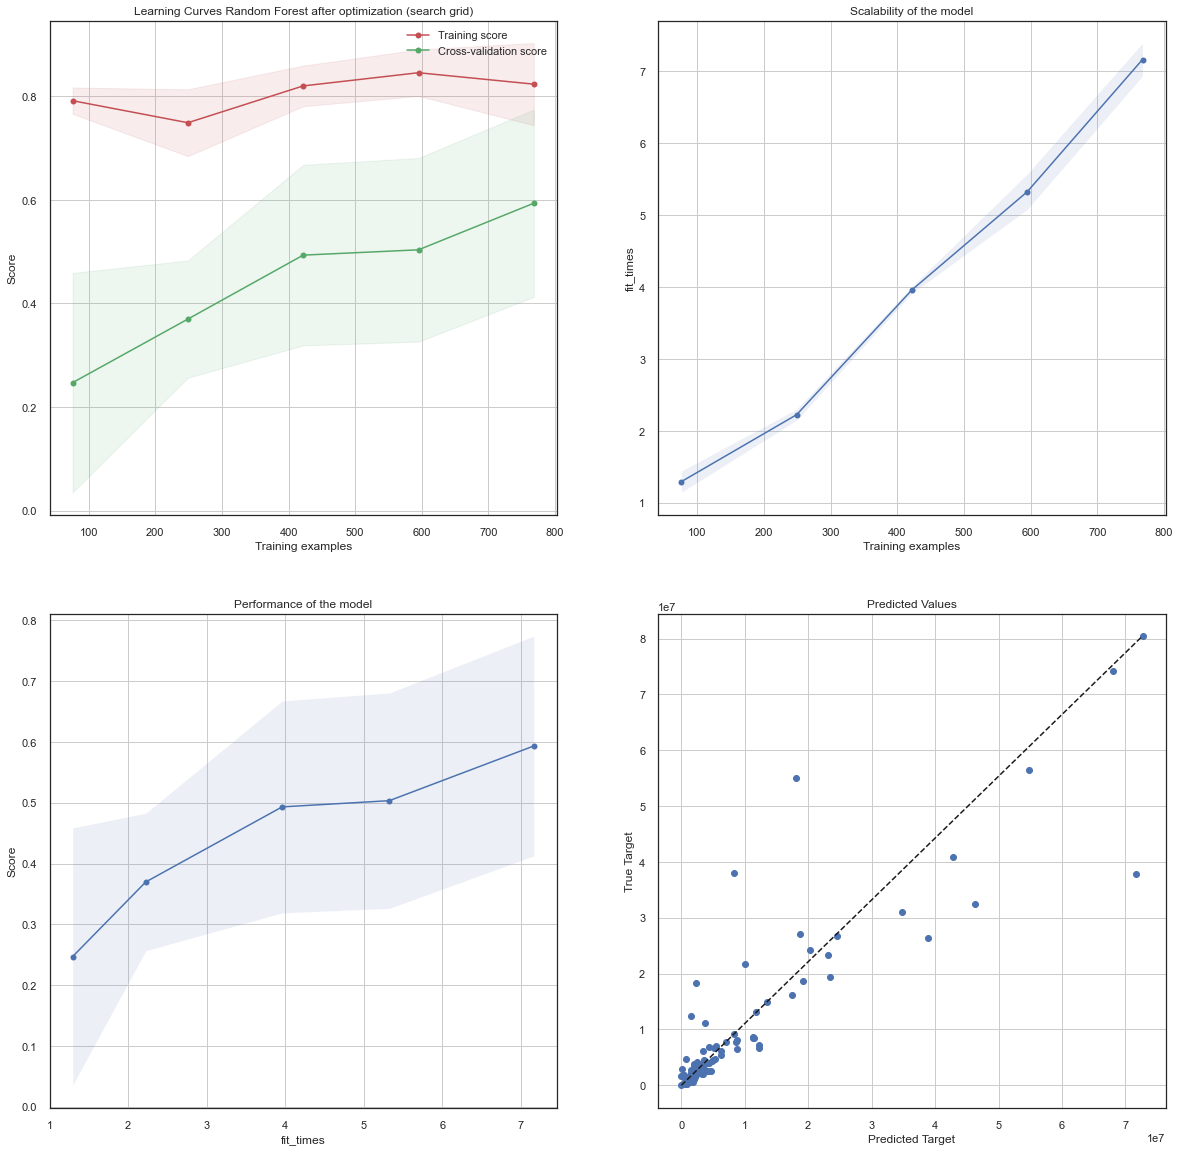

In [54]:
# Visualize learning curves
plt.figure()

estimator = results_random_forest_gs[6]

title = r"Learning Curves Random Forest after optimization (search grid)"
plot_learning_curve(estimator, 
                    title, 
                    X, 
                    y,
                    results_random_forest_gs[3],
                    results_random_forest_gs[4],
                    results_random_forest_gs[5],
                    cv=3)

plt.show()

## CatBoost regressor

In [ ]:
# Requires some ressources functions are commented

### Raw

Learning rate set to 0.039579
0:	learn: 1.9206460	total: 73.1ms	remaining: 1m 13s
1:	learn: 1.8977197	total: 74.7ms	remaining: 37.3s
2:	learn: 1.8765311	total: 75.8ms	remaining: 25.2s
3:	learn: 1.8488287	total: 77.4ms	remaining: 19.3s
4:	learn: 1.8252142	total: 79ms	remaining: 15.7s
5:	learn: 1.8064642	total: 80.5ms	remaining: 13.3s
6:	learn: 1.7899528	total: 82ms	remaining: 11.6s
7:	learn: 1.7734351	total: 83.5ms	remaining: 10.4s
8:	learn: 1.7550449	total: 85ms	remaining: 9.36s
9:	learn: 1.7306572	total: 86.4ms	remaining: 8.56s
10:	learn: 1.7154361	total: 87.9ms	remaining: 7.9s
11:	learn: 1.7029246	total: 89.2ms	remaining: 7.35s
12:	learn: 1.6877453	total: 90.7ms	remaining: 6.88s
13:	learn: 1.6760256	total: 92.1ms	remaining: 6.49s
14:	learn: 1.6627906	total: 93.6ms	remaining: 6.14s
15:	learn: 1.6494273	total: 95ms	remaining: 5.84s
16:	learn: 1.6379372	total: 96.5ms	remaining: 5.58s
17:	learn: 1.6201278	total: 97.9ms	remaining: 5.34s
18:	learn: 1.6094457	total: 99.3ms	remaining: 5.13s


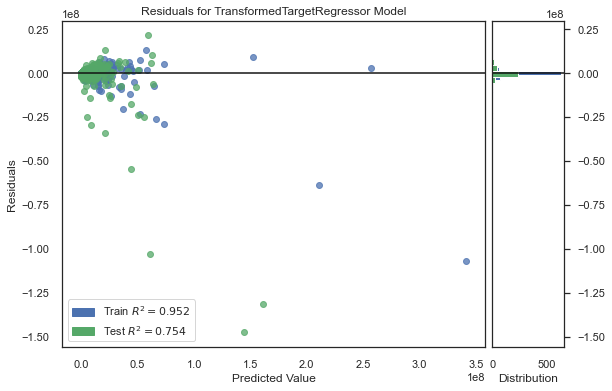

In [55]:
# regression_eval_model_function is defined in utils.py
'''results_cat_boost = regression_eval_model_function(X, 
                                                   y, 
                                                   numerical_list, 
                                                   categorical_list,
                                                   'SiteEnergyUse(kBtu)',
                                                   CatBoostRegressor(), 
                                                   StandardScaler(),
                                                   0.3,
                                                   0, 
                                                   3
                                                  )'''


### Grid Search

In [ ]:
# regression_eval_model_function is defined in utils.py
'''results_cat_boost_gs = regression_eval_model_function(X, 
                                                   y, 
                                                   numerical_list, 
                                                   categorical_list,
                                                   'SiteEnergyUse(kBtu)',
                                                   CatBoostRegressor(), 
                                                   StandardScaler(),
                                                   0.1,
                                                   1, 
                                                   3
                                                  )'''

Learning rate set to 0.039748
0:	learn: 1.9754740	total: 5.65ms	remaining: 5.65s
1:	learn: 1.9542345	total: 8.31ms	remaining: 4.15s
2:	learn: 1.9351822	total: 23.6ms	remaining: 7.84s
3:	learn: 1.9090201	total: 26.4ms	remaining: 6.57s
4:	learn: 1.8829357	total: 29.4ms	remaining: 5.85s
5:	learn: 1.8611710	total: 34.3ms	remaining: 5.68s
6:	learn: 1.8420187	total: 37.1ms	remaining: 5.26s
7:	learn: 1.8237303	total: 40.2ms	remaining: 4.98s
8:	learn: 1.8067865	total: 43.4ms	remaining: 4.78s
9:	learn: 1.7897024	total: 47.6ms	remaining: 4.71s
10:	learn: 1.7689302	total: 52.2ms	remaining: 4.69s
11:	learn: 1.7536448	total: 56.6ms	remaining: 4.66s
12:	learn: 1.7385092	total: 58.9ms	remaining: 4.47s
13:	learn: 1.7284822	total: 61.1ms	remaining: 4.3s
14:	learn: 1.7146562	total: 65.4ms	remaining: 4.29s
15:	learn: 1.7018583	total: 67.9ms	remaining: 4.18s
16:	learn: 1.6911179	total: 70.2ms	remaining: 4.06s
17:	learn: 1.6744899	total: 73ms	remaining: 3.98s
18:	learn: 1.6592388	total: 75.2ms	remaining: 3

### Learning Curves

In [ ]:
# Visualize learning curves
'''plt.figure()

estimator = results_cat_boost_gs[6]

title = r"Learning Curves Dummy Regressor after optimization (search grid)"
plot_learning_curve(estimator, 
                    title, 
                    X, 
                    y, 
                    results_cat_boost_gs[3],
                    results_cat_boost_gs[4],
                    results_cat_boost_gs[5],
                    cv=3)

plt.show()'''

# Lazy_predict on premise 

### No grid

#### No CV

##### Test Set

In [ ]:
# lazy_predict_on_premise_function is defined in utils.py
df_no_optimization = lazy_predict_on_premise_function('R2', 
                                                      'descending',
                                                      dummy=results_dummy_regr[0],
                                                      linear=results_linear_regression[0],
                                                      knn=results_knn[0],
                                                      svr=results_svr[0],
                                                      grad_boost=results_gradient_boosting[0],
                                                      xgboost=results_xgboost[0],
                                                      catboost=results_cat_boost[0],
                                                      random_forest=results_random_forest[0]
                                                      )  
                                                      
df_no_optimization

#### CV

##### Train Set

In [ ]:
# lazy_predict_on_premise_function is defined in utils.py
df_no_optimization_cv_train = lazy_predict_on_premise_function('R2', 
                                                               'descending',
                                                               dummy=results_dummy_regr[1],
                                                               linear=results_linear_regression[1],
                                                               knn=results_knn[1],
                                                               svr=results_svr[1],
                                                               grad_boost=results_gradient_boosting[1],
                                                               xgboost=results_xgboost[1],
                                                               catboost=results_cat_boost[1],
                                                               random_forest=results_random_forest[1]
                                                               )                                
df_no_optimization_cv_train

##### Test Set

In [ ]:
# lazy_predict_on_premise_function is defined in utils.py
df_no_optimization_cv_test = lazy_predict_on_premise_function('R2', 
                                                              'descending',
                                                              dummy=results_dummy_regr[2],
                                                              linear=results_linear_regression[2],
                                                              knn=results_knn[2],
                                                              svr=results_svr[2],
                                                              grad_boost=results_gradient_boosting[2],
                                                              xgboost=results_xgboost[2],
                                                              catboost=results_cat_boost[2],
                                                              random_forest=results_random_forest[2]
                                                             )                                
df_no_optimization_cv_test

### Grid

#### No CV

##### Test Set

In [ ]:
# lazy_predict_on_premise_function is defined in utils.py
df_grid_optimization = lazy_predict_on_premise_function('R2', 
                                                        'descending',
                                                        dummy_gs=results_dummy_regr_gs[0],
                                                        #linear=results_linear_regression[0],
                                                        ridge=results_ridge[0],
                                                        ridge_cv=results_ridge_cv[0],
                                                        lasso=results_lasso[0],
                                                        knn_gs=results_knn_gs[0],
                                                        #svr_gs=results_svr_gs[0],
                                                        grad_boost_gs=results_gradient_boosting_gs[0],
                                                        xgboost_gs=results_xgboost[0],
                                                        catboost_gs=results_cat_boost_gs[0],
                                                         #random_forest_gs=results_random_forest_gs[0]
                                                        )

df_grid_optimization

#### CV

##### Train Set

In [ ]:
# lazy_predict_on_premise_function is defined in utils.py
df_grid_optimization_cv_train = lazy_predict_on_premise_function('R2', 
                                                                 'descending',
                                                                 dummy_gs=results_dummy_regr_gs[1],
                                                                 #linear=results_linear_regression[1],
                                                                 ridge=results_ridge[1],
                                                                 lasso=results_lasso[1],
                                                                 knn_gs=results_knn_gs[1],
                                                                 svr_gs=results_svr_gs[1],
                                                                 grad_boost_gs=results_gradient_boosting_gs[1],
                                                                 xgboost_gs=results_xgboost_gs[1],
                                                                 catboost_gs=results_cat_boost_gs[1],
                                                                 random_forest_gs=results_random_forest_gs[1]
                                                                )

df_grid_optimization_cv_train

##### Test Set

In [ ]:
# lazy_predict_on_premise_function is defined in utils.py
df_grid_optimization_cv_test = lazy_predict_on_premise_function('R2', 
                                                                'descending',
                                                                dummy_gs=results_dummy_regr_gs[2],
                                                                #linear=results_linear_regression[2],
                                                                ridge=results_ridge[2],
                                                                lasso=results_lasso[2],
                                                                knn_gs=results_knn_gs[2],
                                                                svr_gs=results_svr_gs[2],
                                                                grad_boost_gs=results_gradient_boosting_gs[2],
                                                                xgboost_gs=results_xgboost_gs[2],
                                                                catboost_gs=results_cat_boost_gs[2],
                                                                random_forest_gs=results_random_forest_gs[2]
                                                                )

df_grid_optimization_cv_test

# Performance by building type

In [ ]:
#
primary_property_type_list = df_general_training.PrimaryPropertyType.unique()
primary_property_type_list

## Final model (XGBoost) Performance by BuildingType

In [ ]:
#
performance_final_model_by_building_type(results_xgboost_gs[7],
                                           results_xgboost_gs[6], 
                                           'y_test',
                                           primary_property_type_list, 
                                           15,
                                           'R2',
                                           'descending'
                                          )
        

## Performance of a Given Regressor Type (GradientBoosting) Fitted for Each BuildingType

In [ ]:
#
performance_final_model_regressor_by_building_type(df_general_training, 
                                                   GradientBoostingRegressor(),
                                                   StandardScaler(),
                                                   3, 
                                                   primary_property_type_list, 
                                                   numerical_list, 
                                                   categorical_list, 
                                                   'SiteEnergyUse(kBtu)',
                                                   15
                                                  )


# GHGEmissions(MetricTonsCO2e) prediction 

## With ENERGYSTARScore variable

In [ ]:
# prepare_input_data() is defined in utils_elec_code.py
df_general_training_co2, X_co2, y_co2, numerical_list_co2, categorical_list_co2 = prepare_input_data(df_general, 'GHGEmissions(MetricTonsCO2e)')

#
msno.bar(df_general_training_co2)

### Grid Search

In [ ]:
# regression_eval_model_function is defined in utils.py
results_xgboost_gs_co2 = regression_eval_model_function(X_co2, 
                                                         y_co2, 
                                                         numerical_list_co2, 
                                                         categorical_list_co2, 
                                                         'GHGEmissions(MetricTonsCO2e)',
                                                         XGBRegressor(),
                                                         StandardScaler(),
                                                         0.3,
                                                         1, 
                                                         3
                                                        )

### Features Importance

In [ ]:
#
list_variables_model_minus_target = numerical_list + categorical_list 

#
estimator = results_xgboost_gs_co2[6]
X_test = results_xgboost_gs_co2[3]
y_test = results_xgboost_gs_co2[4]

#
result = permutation_importance(estimator, X_test, y_test)
xgboost_importances = pd.Series(result.importances_mean, index=list_variables_model_minus_target)
xgboost_importances_sorted = xgboost_importances.sort_values(ascending=False, inplace=False, kind='quicksort')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,8))

# Plot
xgboost_importances_sorted.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model - XGBoost Regressor")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()




### Learning Curves

In [ ]:
# Visualize learning curves
plt.figure()

estimator_xgboost_co2 = results_xgboost_gs_co2[6]

title = r"Learning Curves XGBoost after optimization (search grid)"
plot_learning_curve(estimator_xgboost_co2, 
                    title, 
                    X_co2, 
                    y_co2, 
                    results_xgboost_gs_co2[3], 
                    results_xgboost_gs_co2[4], 
                    results_xgboost_gs_co2[5], 
                    cv=3)

plt.show()

## Without ENERGYSTARScore variable

In [ ]:
# prepare_input_data() is defined in utils_elec_code.py
df_general_training_co2_bis, X_co2_bis, y_co2_bis, numerical_list_co2_bis, categorical_list_co2_bis = prepare_input_data(df_general, 'GHGEmissions(MetricTonsCO2e)', drop_variable='ENERGYSTARScore')

#
msno.bar(X_co2_bis)

### Grid Search

In [ ]:
# regression_eval_model_function is defined in utils.py
results_xgboost_gs_co2_bis = regression_eval_model_function(X_co2_bis, 
                                                             y_co2_bis, 
                                                             numerical_list_co2_bis, 
                                                             categorical_list_co2_bis, 
                                                             'GHGEmissions(MetricTonsCO2e)',
                                                             XGBRegressor(),
                                                             StandardScaler(),
                                                             0.3,
                                                             1, 
                                                             3
                                                           )

### Features Importance

In [ ]:
numerical_list_bis = ['PropertyGFATotal',
                         'PropertyGFABuilding(s)',
                         'LargestPropertyUseTypeGFA',
                         'SecondLargestPropertyUseTypeGFA',
                         'ThirdLargestPropertyUseTypeGFA',
                         'PropertyGFAParking',
                         'NumberofBuildings',
                         'NumberofFloors',
                         'Age'
                     ]

In [ ]:
#
list_variables_model_minus_target = numerical_list_bis + categorical_list

#
estimator = results_xgboost_gs_co2_bis[6]
X_test = results_xgboost_gs_co2_bis[3]
y_test = results_xgboost_gs_co2_bis[4]

#
result = permutation_importance(estimator, X_test, y_test)
xgboost_importances = pd.Series(result.importances_mean, index=list_variables_model_minus_target)
xgboost_importances_sorted = xgboost_importances.sort_values(ascending=False, inplace=False, kind='quicksort')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,8))

# Plot
xgboost_importances_sorted.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model - XGBoost Regressor")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()





### Learning Curves

In [ ]:
# Visualize learning curves
plt.figure()

estimator_xgboost_co2_bis = results_xgboost_gs_co2_bis[6]

title = r"Learning Curves XGBoost after optimization (search grid)"
plot_learning_curve(estimator_xgboost_co2_bis, 
                    title, 
                    X_co2_bis, 
                    y_co2_bis, 
                    results_xgboost_gs_co2_bis[3], 
                    results_xgboost_gs_co2_bis[4], 
                    results_xgboost_gs_co2_bis[5], 
                    cv=3)

plt.show()

### Learning Curves Comparaison

In [ ]:
# Visualize learning curves comparaison
plt.figure()

estimator_xgboost_co2 = results_xgboost_gs_co2[6]
estimator_xgboost_co2_bis = results_xgboost_gs_co2_bis[6]

plot_learning_curve_compare(estimator_xgboost_co2, estimator_xgboost_co2_bis, title, X_co2, y_co2, cv=3)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(r"Learning Curves XGBoostRegressor model - Test Set", fontsize=16)
plt.show()

In [ ]:
STOP_